# Import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Create Sample Data

In [ ]:
# Create a sample dataset of employees
data = {
    'employee_id': range(1, 101),
    'department': np.random.choice(['Engineering', 'Sales', 'HR', 'Marketing'], 100, p=[0.5, 0.3, 0.1, 0.1]),
    'salary': np.random.randint(50000, 120000, 100)
}
population_df = pd.DataFrame(data)
print("Original Population Data (First 5 Rows)")
print(population_df.head())
print(f"\nPopulation Size: {len(population_df)}")

Original Population Data (First 5 Rows)
   employee_id   department  salary
0            1        Sales  102550
1            2        Sales   71119
2            3  Engineering   78821
3            4        Sales   74812
4            5    Marketing   87262

Population Size: 100


In [ ]:
print("\nPopulation Department Distribution:")
print(population_df['department'].value_counts(normalize=True))


Population Department Distribution:
department
Engineering    0.45
Sales          0.35
Marketing      0.12
HR             0.08
Name: proportion, dtype: float64


## Simple Random Sampling

In [ ]:
# Get a random sample of 20 employees. `frac` can also be used for a fraction.
simple_random_sample = population_df.sample(n=20, random_state=42) # random_state for reproducibility
print("1. Simple Random Sample (n=20)")
print(simple_random_sample)
print("\nSample Department Distribution:")
print(simple_random_sample['department'].value_counts(normalize=True))

1. Simple Random Sample (n=20)
    employee_id   department  salary
83           84  Engineering  101414
53           54  Engineering   96617
70           71    Marketing   91950
45           46  Engineering  110093
44           45        Sales   75439
39           40  Engineering   67012
22           23  Engineering  118374
80           81        Sales   82640
10           11  Engineering   94722
0             1        Sales  102550
18           19        Sales   96138
30           31  Engineering   71128
73           74        Sales   88546
33           34  Engineering   66319
90           91  Engineering   81913
4             5    Marketing   87262
76           77        Sales   75091
77           78           HR   74324
12           13        Sales   78427
31           32    Marketing   54917

Sample Department Distribution:
department
Engineering    0.45
Sales          0.35
Marketing      0.15
HR             0.05
Name: proportion, dtype: float64


## Stratified Sampling

In [ ]:
# We want to create a 20% sample (test set) that preserves the department distribution.
# This is a very common use case for creating training and testing sets.
# Here, X is the data, y is the column to stratify by.
X = population_df
y = population_df['department']

# train_test_split can create a single stratified sample by ignoring one of the splits.
_, stratified_sample = train_test_split(X, test_size=0.20, random_state=42, stratify=y)

print("2. Stratified Sample (n=20)")
print(stratified_sample)

2. Stratified Sample (n=20)
    employee_id   department  salary
99          100        Sales   61133
89           90        Sales  101112
1             2        Sales   71119
18           19        Sales   96138
27           28           HR   95830
5             6    Marketing   74115
98           99  Engineering   88037
45           46  Engineering  110093
67           68        Sales   57610
28           29  Engineering   83257
42           43  Engineering  102397
8             9        Sales   80745
57           58           HR   98355
53           54  Engineering   96617
22           23  Engineering  118374
34           35  Engineering   60748
40           41  Engineering   94412
83           84  Engineering  101414
29           30    Marketing   73574
6             7        Sales   79044


In [ ]:
print("\nSample Department Distribution:")
print(stratified_sample['department'].value_counts(normalize=True))
print("Notice how this distribution is much closer to the original population's distribution.")


Sample Department Distribution:
department
Engineering    0.45
Sales          0.35
HR             0.10
Marketing      0.10
Name: proportion, dtype: float64
Notice how this distribution is much closer to the original population's distribution.


## Systematic Sampling

In [ ]:
def systematic_sampling(df, n):
    """Performs systematic sampling on a DataFrame."""
    N = len(df)
    k = N // n
    # Choose a random starting point between 0 and k-1
    start_index = np.random.randint(0, k)
    # Get indices for the sample
    indices = np.arange(start_index, N, k)
    return df.iloc[indices]

systematic_sample = systematic_sampling(population_df, 20)
print("3. Systematic Sample (n=20)")
print(systematic_sample)

3. Systematic Sample (n=20)
    employee_id   department  salary
3             4        Sales   74812
8             9        Sales   80745
13           14  Engineering   91278
18           19        Sales   96138
23           24        Sales   96263
28           29  Engineering   83257
33           34  Engineering   66319
38           39           HR   88710
43           44  Engineering  114593
48           49  Engineering   96166
53           54  Engineering   96617
58           59        Sales   87841
63           64           HR   93551
68           69        Sales   62107
73           74        Sales   88546
78           79  Engineering   69779
83           84  Engineering  101414
88           89        Sales   60588
93           94    Marketing   93996
98           99  Engineering   88037


## Cluster Sampling

In [ ]:
# In cluster sampling, we treat groups as the unit. Let's use 'department' as clusters.
# 1. Identify unique clusters
clusters = population_df['department'].unique()
print(f"Unique clusters (departments): {clusters}")

# 2. Randomly choose some clusters
chosen_clusters = np.random.choice(clusters, size=2, replace=False)
print(f"Randomly chosen clusters: {chosen_clusters}")

# 3. Sample all members from the chosen clusters
cluster_sample = population_df[population_df['department'].isin(chosen_clusters)]
print("\nCluster Sample (all members from chosen clusters)")
print(cluster_sample)

Unique clusters (departments): ['Sales' 'Engineering' 'Marketing' 'HR']
Randomly chosen clusters: ['Engineering' 'Sales']

Cluster Sample (all members from chosen clusters)
    employee_id   department  salary
0             1        Sales  102550
1             2        Sales   71119
2             3  Engineering   78821
3             4        Sales   74812
6             7        Sales   79044
..          ...          ...     ...
94           95  Engineering   88588
96           97  Engineering   76004
97           98        Sales  104680
98           99  Engineering   88037
99          100        Sales   61133

[80 rows x 3 columns]


# Central Limit Theorem

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Data

In [ ]:
# We'll use an exponential distribution, which is heavily skewed to the right.
# This clearly shows that the CLT works even for non-normal populations.
population_size = 100000
# The scale parameter in exponential distribution is 1/lambda; it's related to the mean.
population = np.random.exponential(scale=10, size=population_size)

# Calculate true population parameters
pop_mean = np.mean(population)
pop_std = np.std(population)

print(f"Population Details:")
print(f"Population Mean (μ): {pop_mean:.2f}")
print(f"Population Std Dev (σ): {pop_std:.2f}")

Population Details:
Population Mean (μ): 10.01
Population Std Dev (σ): 10.01


## Drawing Samples

In [ ]:
num_samples = 10000 # The number of sample means we will collect
sample_size = 50    # The size of each individual sample (n)

# We'll store the mean of each sample in this list
list_of_sample_means = []

# Loop to simulate the sampling process
for _ in range(num_samples):
    # Draw one random sample of size 'n' from the population
    sample = np.random.choice(population, size=sample_size)
    # Calculate the mean of this sample and add it to our list
    list_of_sample_means.append(np.mean(sample))

## Analysing the Results

In [ ]:
# The list of sample means is our sampling distribution
sampling_distribution = np.array(list_of_sample_means)

# Calculate the mean and standard error of the sampling distribution
mean_of_means = np.mean(sampling_distribution)
std_deviation = np.std(sampling_distribution)
print(mean_of_means)
print(std_deviation)

9.99664647595541
1.4015233342964717


In [ ]:
# Calculate the theoretical standard error using the CLT formula
theoretical_std_error = pop_std / np.sqrt(sample_size)

print("Sampling Distribution Analysis:")
print(f"Mean of Sample Means: {mean_of_means:.2f} (Close to population mean? {np.isclose(pop_mean, mean_of_means, atol=0.1)})")
print(f"Observed Standard Error: {std_deviation:.2f}")

Sampling Distribution Analysis:
Mean of Sample Means: 10.00 (Close to population mean? True)
Observed Standard Error: 1.40


## Visualization

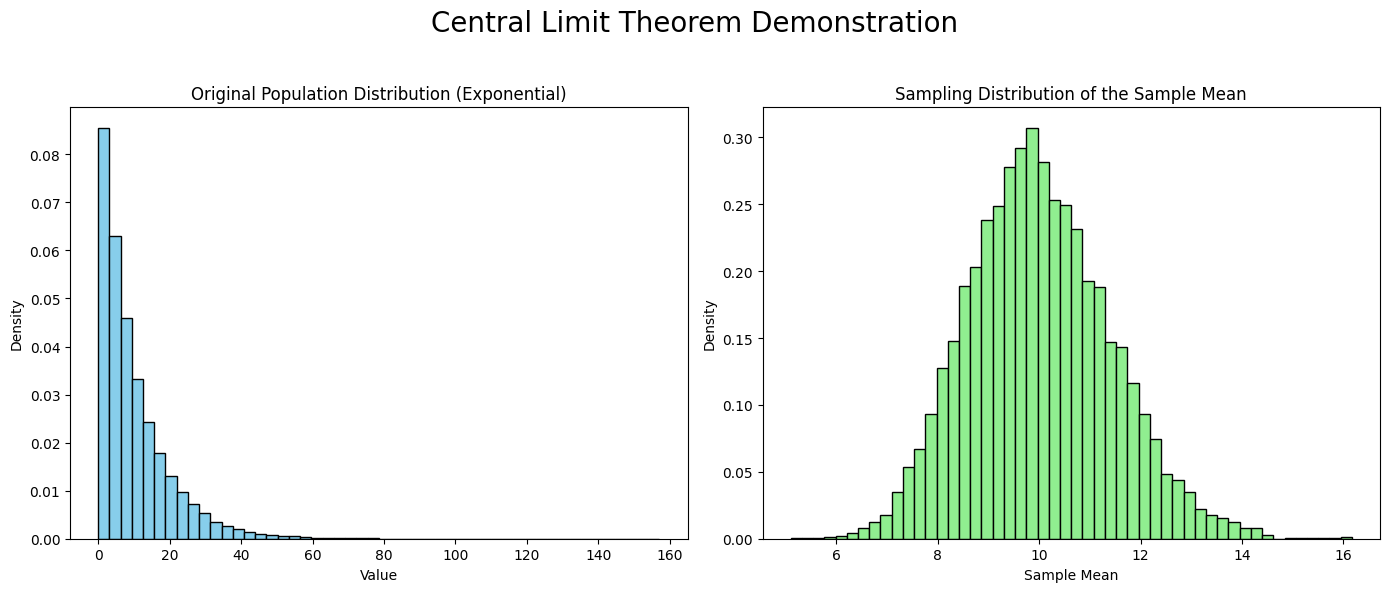

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the original population distribution
ax1.hist(population, bins=50, density=True, color='skyblue', edgecolor='black')
ax1.set_title('Original Population Distribution (Exponential)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')

# Plot the sampling distribution of the sample mean
ax2.hist(sampling_distribution, bins=50, density=True, color='lightgreen', edgecolor='black')
ax2.set_title('Sampling Distribution of the Sample Mean')
ax2.set_xlabel('Sample Mean')
ax2.set_ylabel('Density')

fig.suptitle('Central Limit Theorem Demonstration', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();